# Importing the necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import glob
import shutil
import seaborn as sns
import math
from scipy.stats import stats

In [2]:
dflp=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\leftpace_aggr.csv")
dfls=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\leftspin_aggr.csv")
dfrp=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\rightpace_aggr.csv")
dfrs=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\rightspin_aggr.csv")

In [3]:
dflp.head()

,inning_number,Bowler,Runs_Conceded,total_deliveries,runs_left,runs_right,delivery_left,delivery_right,wickets_taken,wickets_left,...,bowled,caught,lbw,runout,stumped,economy,economy_left,economy_right,bowler_hand,bowler_type
0,1.0,A Nehra,927.0,1106.0,155.0,745.0,189.0,917.0,37.0,1.0,...,8.0,21.0,6.0,0.0,0.0,5.028933,4.920635,4.874591,left,pace
1,1.0,AJ McKay,211.0,286.0,57.0,145.0,68.0,218.0,11.0,2.0,...,3.0,6.0,1.0,0.0,0.0,4.426573,5.029412,3.990826,left,pace
2,1.0,AK Peters,34.0,49.0,0.0,29.0,0.0,49.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.163265,NaN,3.551020,left,pace
3,1.0,AM Guruge,163.0,143.0,0.0,158.0,0.0,143.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,6.839161,NaN,6.629371,left,pace
4,1.0,APC Kilowan,18.0,54.0,0.0,16.0,0.0,54.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.000000,NaN,1.777778,left,pace


In [4]:
print(dflp.isna().sum())

inning_number        0
Bowler               0
Runs_Conceded        0
total_deliveries     0
runs_left            0
runs_right           0
delivery_left        0
delivery_right       0
wickets_taken        0
wickets_left         0
wickets_right        0
wide                 0
no_ball              0
leg_byes             0
byes                 0
match_number         0
P1_balls             0
P2_balls             0
P3_balls             0
P1_Runs_Left         0
P2_Runs_Left         0
P3_Runs_Left         0
P1_Runs_Right        0
P2_Runs_Right        0
P3_Runs_Right        0
P1_Runs              0
P2_Runs              0
P3_Runs              0
bowled               0
caught               0
lbw                  0
runout               0
stumped              0
economy              0
economy_left        58
economy_right        2
bowler_hand          0
bowler_type          0
dtype: int64


In [5]:
print(dfls.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        156
economy_right         2
bowler_hand           0
bowler_type           0
dtype: int64


In [6]:
print(dfrp.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        415
economy_right        41
bowler_hand           0
bowler_type           0
dtype: int64


In [7]:
print(dfrs.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        257
economy_right        34
bowler_hand           0
bowler_type           0
dtype: int64


In [8]:
for i in range(dflp.shape[0]):
    if(pd.isnull(dflp.iloc[i,34])):
        dflp['economy_left'][i]=dflp['economy'][i]
    if(pd.isnull(dflp.iloc[i,35])):
        dflp['economy_right'][i]=dflp['economy'][i]
        
for i in range(dfls.shape[0]):
    if(pd.isnull(dfls.iloc[i,34])):
        dfls['economy_left'][i]=dfls['economy'][i]
    if(pd.isnull(dfls.iloc[i,35])):
        dfls['economy_right'][i]=dfls['economy'][i]
        
for i in range(dfrp.shape[0]):
    if(pd.isnull(dfrp.iloc[i,34])):
        dfrp['economy_left'][i]=dfrp['economy'][i]
    if(pd.isnull(dfrp.iloc[i,35])):
        dfrp['economy_right'][i]=dfrp['economy'][i]
        
for i in range(dfrs.shape[0]):
    if(pd.isnull(dfrs.iloc[i,34])):
        dfrs['economy_left'][i]=dfrs['economy'][i]
    if(pd.isnull(dfrs.iloc[i,35])):
        dfrs['economy_right'][i]=dfrs['economy'][i]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12220\1848378165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflp['economy_left'][i]=dflp['economy'][i]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12220\1848378165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflp['economy_right'][i]=dflp['economy'][i]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12220\1848378165.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfls['econ

## Various bowlers in Innings 1

In [9]:
bowllp=[]
for i in range(len(dflp)):
    if(dflp['inning_number'][i]==1.0):
        bowllp.append(dflp['Bowler'][i])
    else:
        break
    

bowlls=[]
for i in range(len(dfls)):
    if(dfls['inning_number'][i]==1.0):
        bowlls.append(dfls['Bowler'][i])
    else:
        break

bowlrp=[]
for i in range(len(dfrp)):
    if(dfrp['inning_number'][i]==1.0):
        bowlrp.append(dfrp['Bowler'][i])
    else:
        break

bowlrs=[]
for i in range(len(dfrs)):
    if(dfrs['inning_number'][i]==1.0):
        bowlrs.append(dfrs['Bowler'][i])
    else:
        break

# Analysis on the deliveries per wicket of the bowlers 

In [10]:
dellp=[]
dells=[]
delrp=[]
delrs=[]
dellp=dflp['total_deliveries']/dflp['wickets_taken']
dells=dfls['total_deliveries']/dfls['wickets_taken']
delrp=dfrp['total_deliveries']/dfrp['wickets_taken']
delrs=dfrs['total_deliveries']/dfrs['wickets_taken']

In [11]:
dellp=dellp[:len(bowllp)]
dells=dells[:len(bowlls)]
delrp=delrp[:len(bowlrp)]
delrs=delrs[:len(bowlrs)]

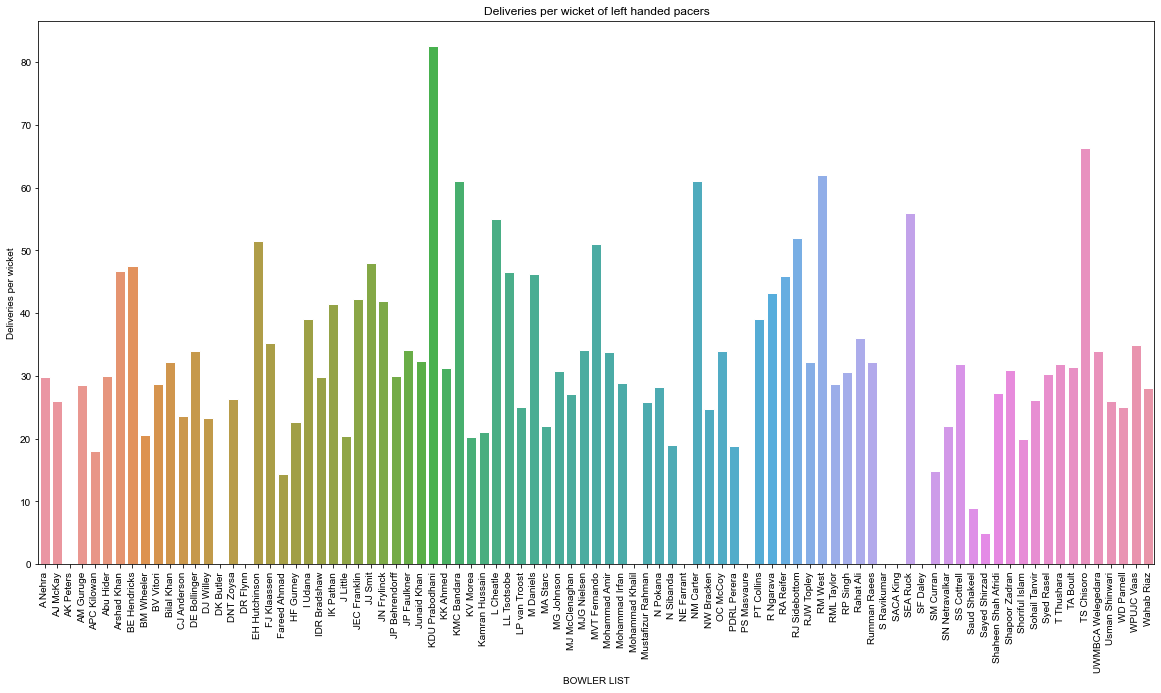

In [12]:
plt.figure(figsize=(20,10))
plt.title('Deliveries per wicket of left handed pacers')
tips={'BOWLER LIST': bowllp, 'Deliveries per wicket' : dellp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

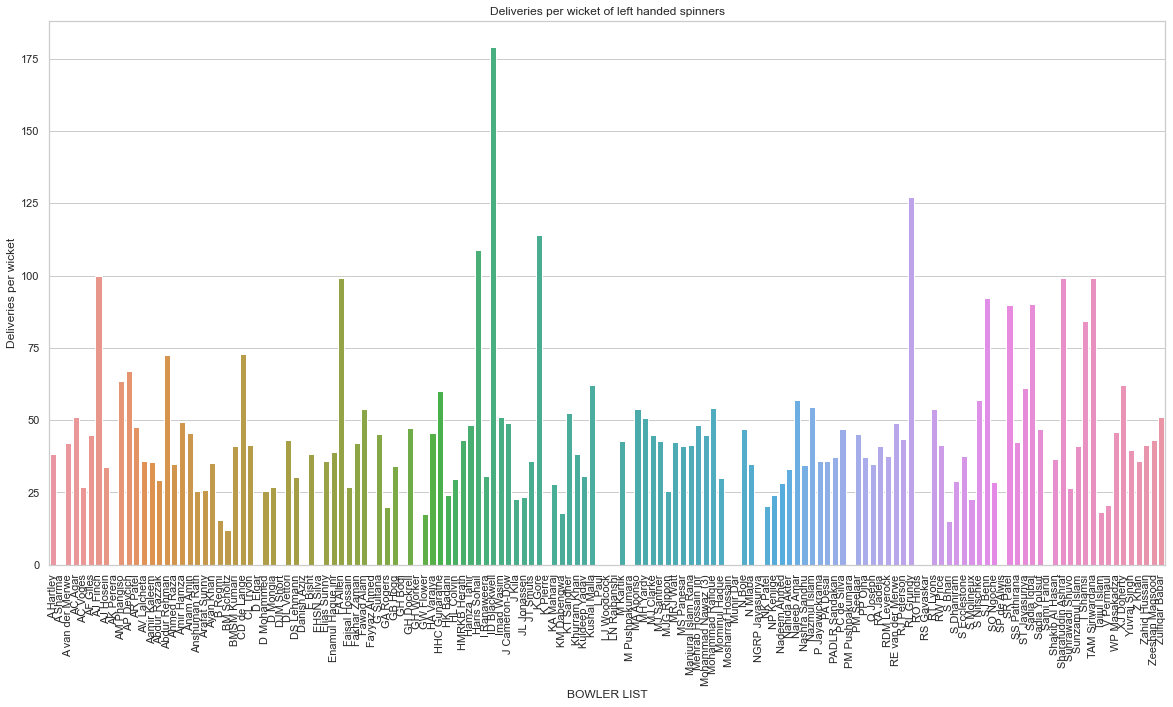

In [13]:
plt.figure(figsize=(20,10))
plt.title('Deliveries per wicket of left handed spinners')
tips={'BOWLER LIST': bowlls, 'Deliveries per wicket' : dells}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

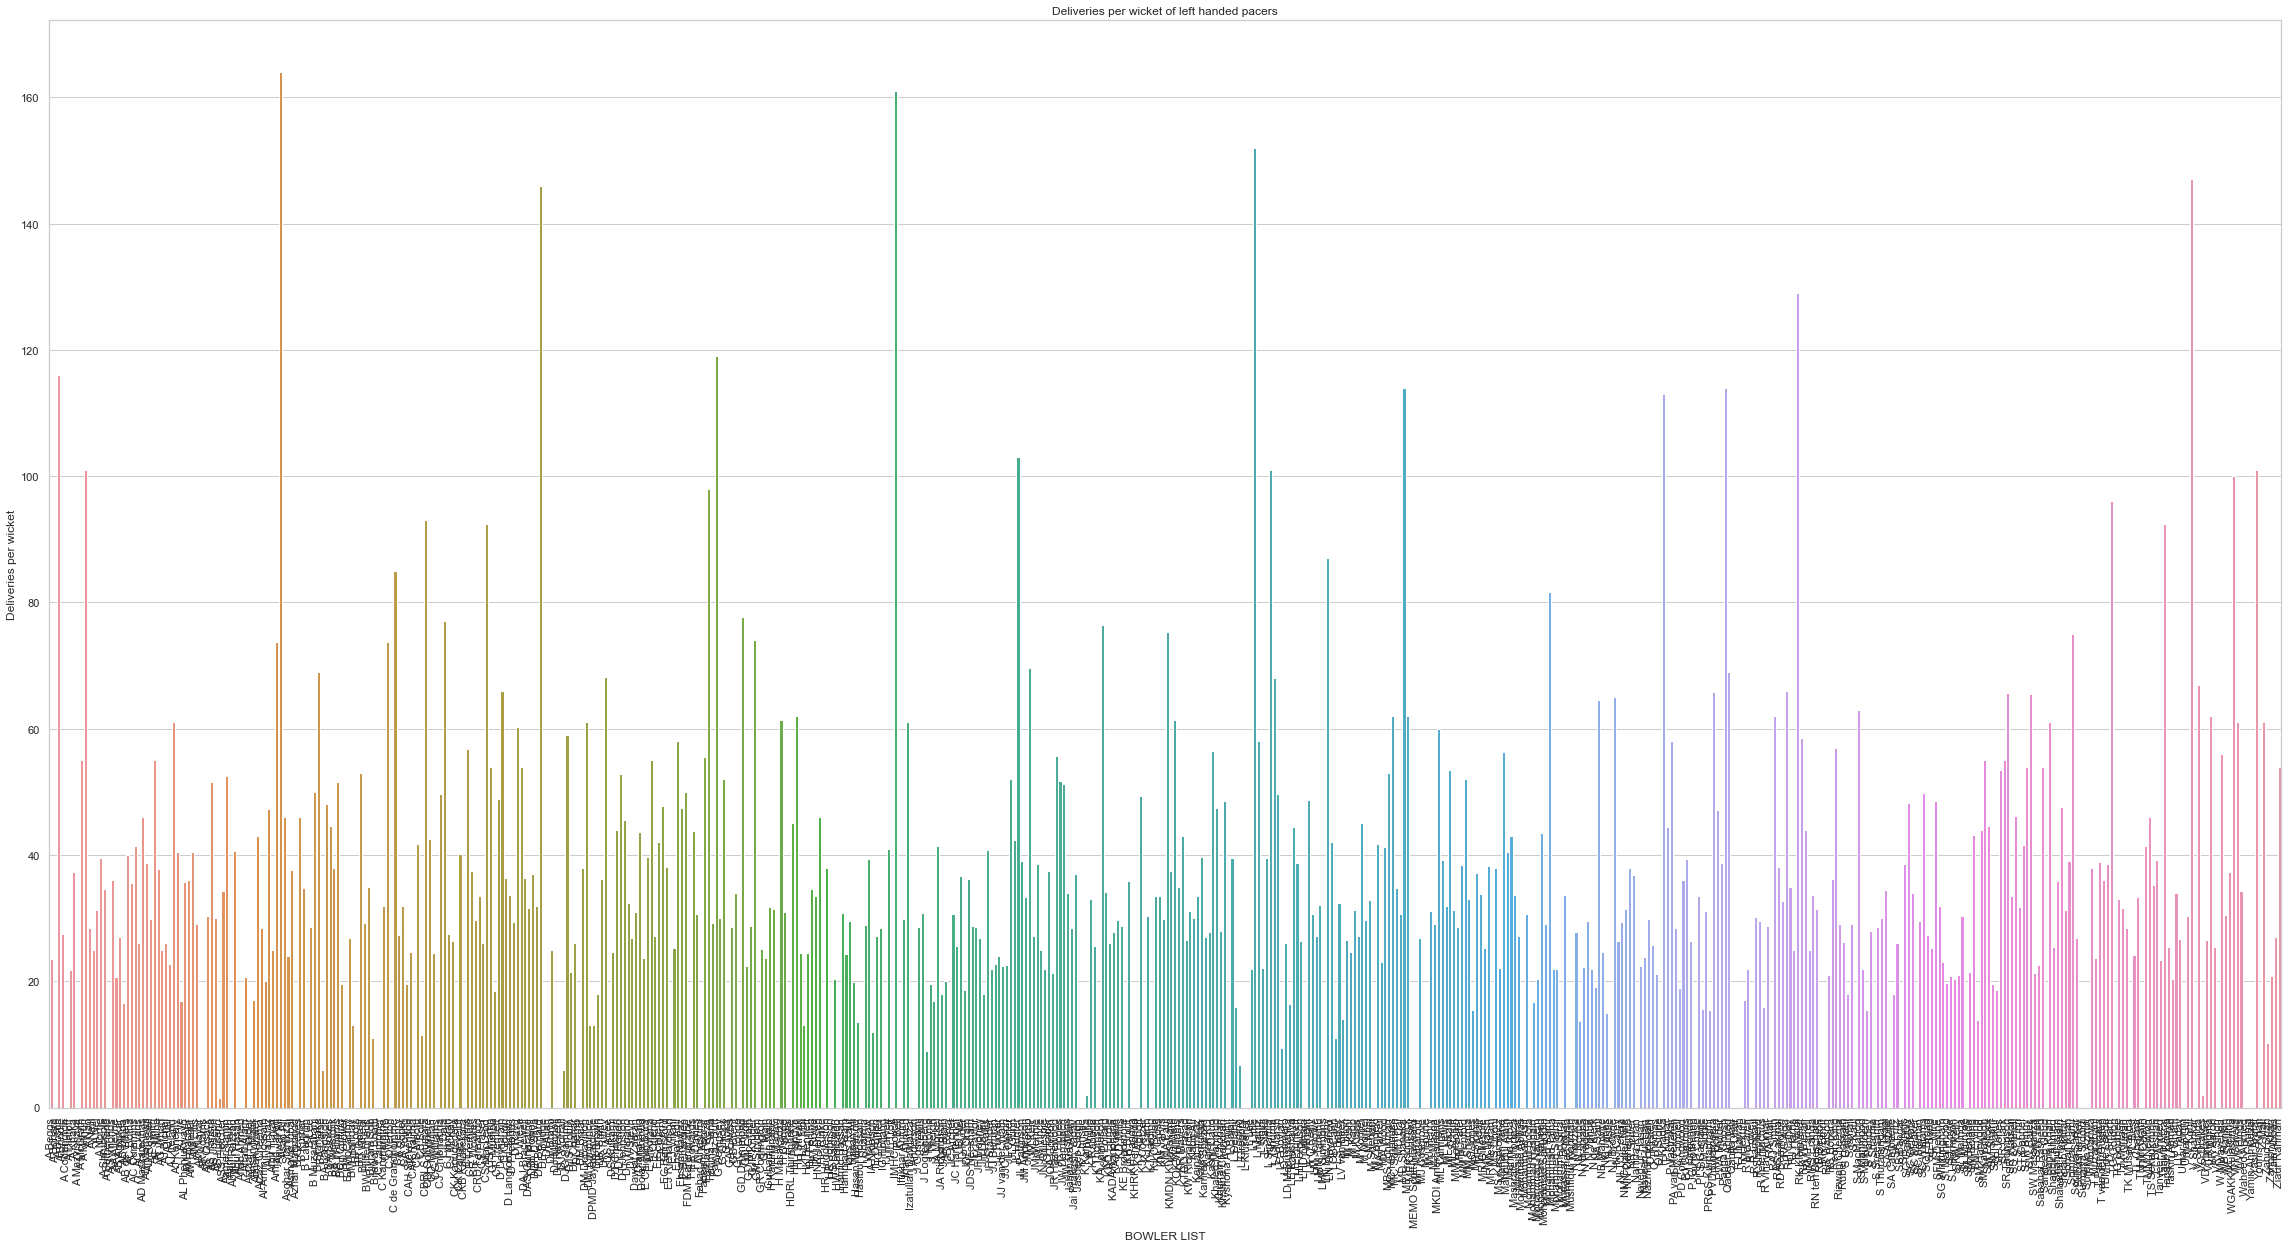

In [14]:
plt.figure(figsize=(40,20))
plt.title('Deliveries per wicket of left handed pacers')
tips={'BOWLER LIST': bowlrp, 'Deliveries per wicket' : delrp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

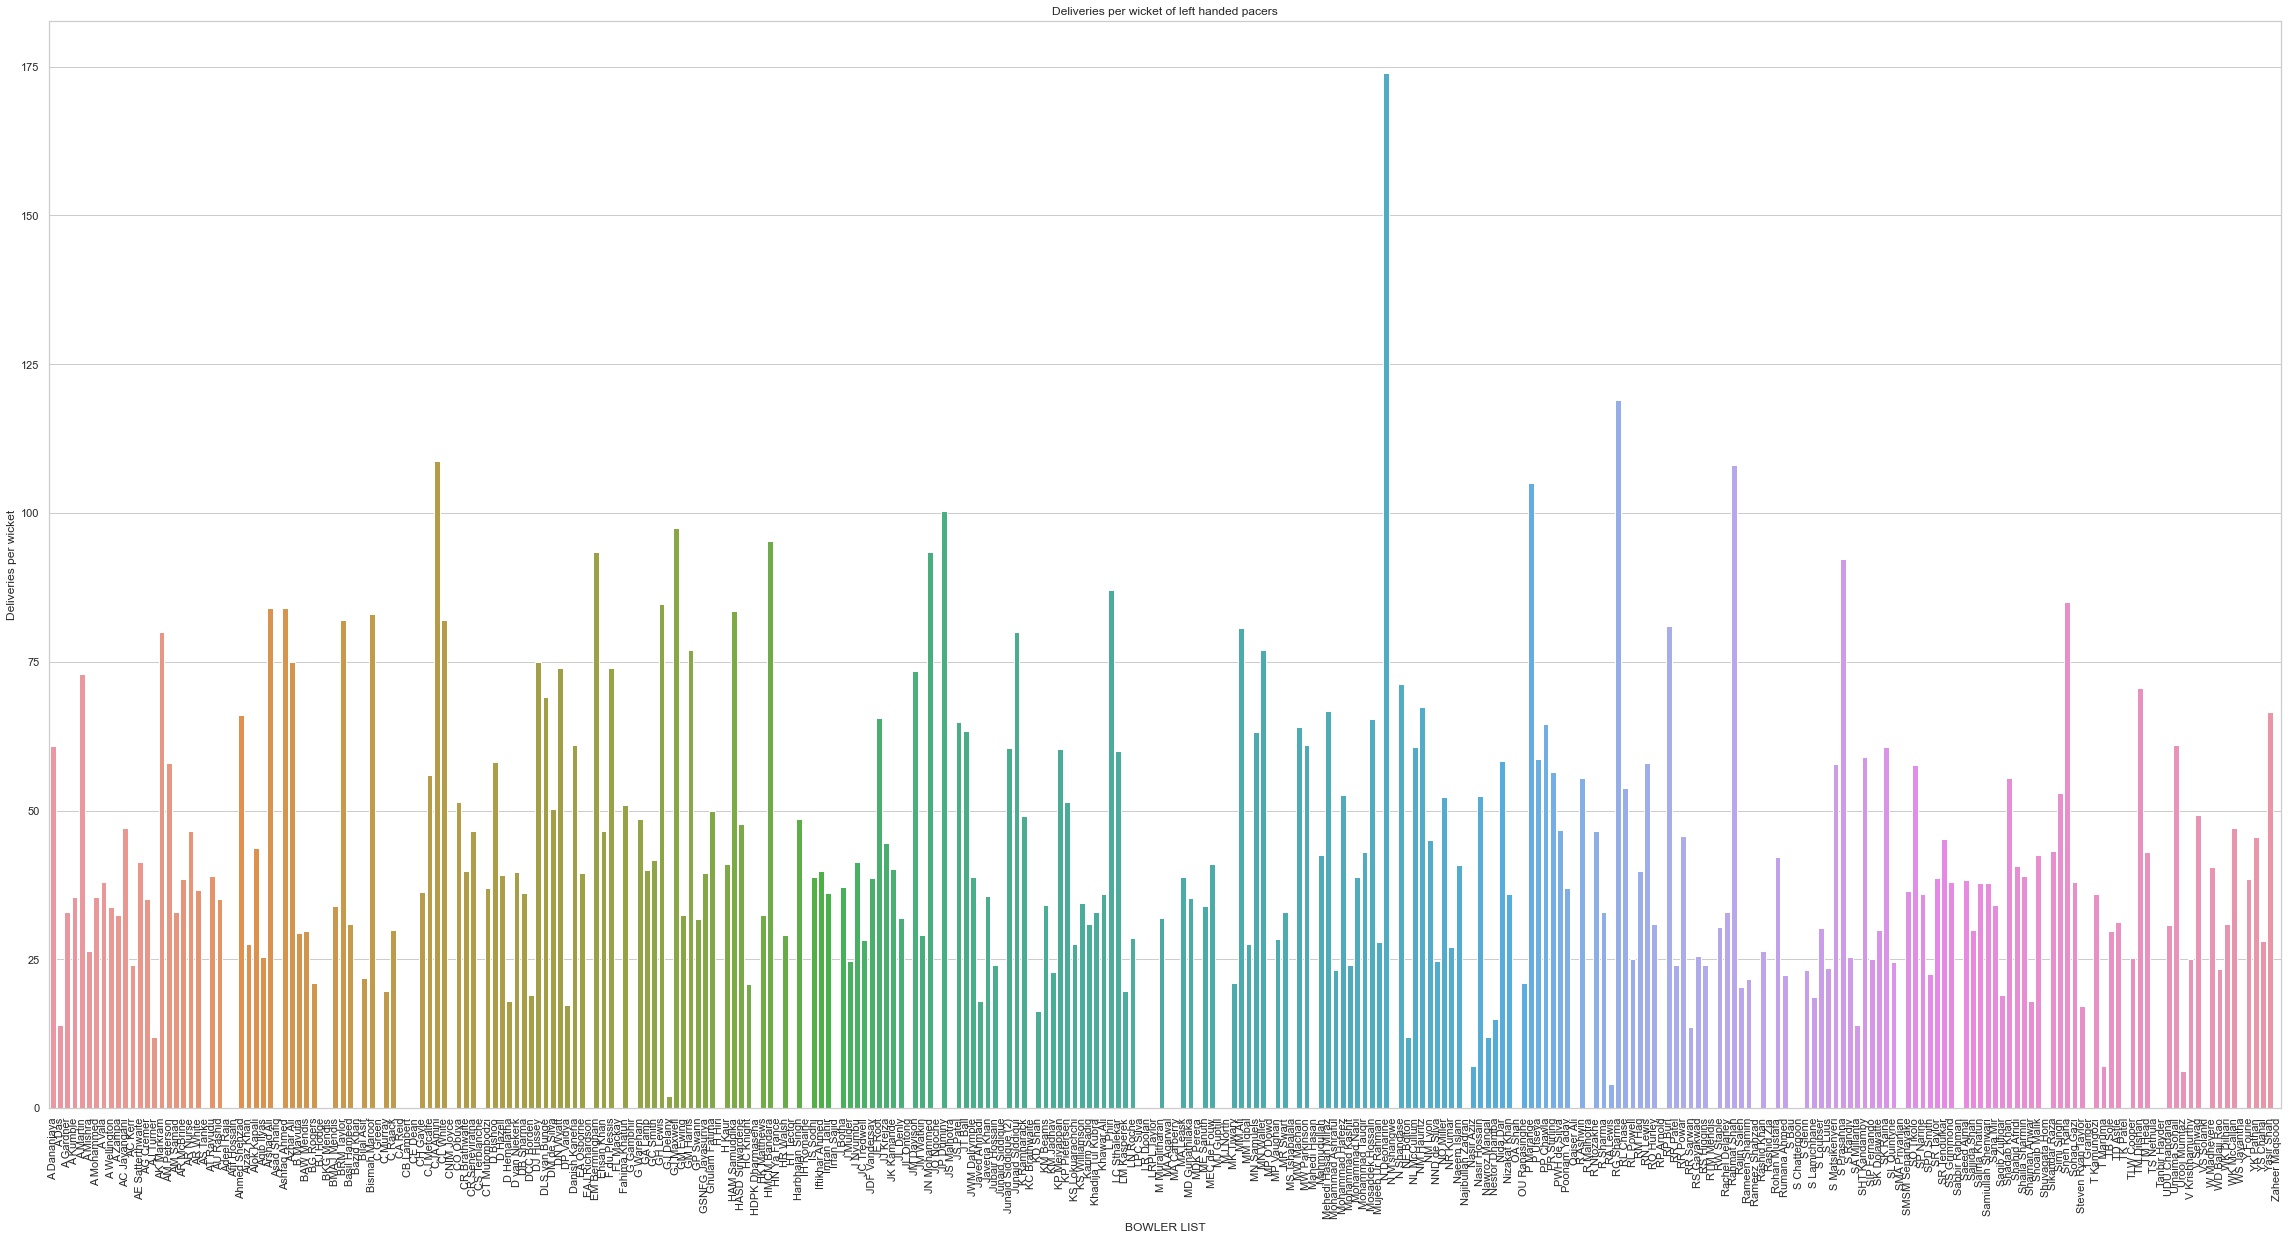

In [15]:
plt.figure(figsize=(40,20))
plt.title('Deliveries per wicket of left handed pacers')
tips={'BOWLER LIST': bowlrs, 'Deliveries per wicket' : delrs}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [16]:
def variance(data):
    n=len(data)
    mean=sum(data)/n;
    dev=[(x-mean)**2 for x in data]
    var=sum(dev)/n
    return var

def stddev(data):
    n=len(data)
    var=variance(data)
    return math.sqrt(var)

In [17]:
dellpup=[]
dellsup=[]
delrpup=[]
delrsup=[]

for i in dellp:
    if(i<1000):
        dellpup.append(i)
for i in dells:
    if(i<1000):
        dellsup.append(i)
for i in delrp:
    if(i<1000):
        delrpup.append(i)
for i in delrs:
    if(i<1000):
        delrsup.append(i)
        
dellp=dellpup
dells=dellsup
delrp=delrpup
delrs=delrsup

In [18]:
#variance and standard deviation for left pace
print("The mean deliveries per wicket of the bowlers of left pace are:",np.mean(dellp))
print("The variance of deliveries per wicket  of the bowlers of left pace are:",variance(dellp))
print("The standard deviation of deliveries per wicket of the bowlers of left pace are:",stddev(dellp))

The mean deliveries per wicket of the bowlers of left pace are: 33.50432189798333
The variance of deliveries per wicket  of the bowlers of left pace are: 178.07961805370124
The standard deviation of deliveries per wicket of the bowlers of left pace are: 13.344647543254982


In [19]:
#variance and standard deviation for left spin
print("The mean deliveries per wicket of the bowlers of left spin are:",np.mean(dells))
print("The variance of deliveries per wicket  of the bowlers of left spin are:",variance(dells))
print("The standard deviation of deliveries per wicket of the bowlers of left spin are:",stddev(dells))

The mean deliveries per wicket of the bowlers of left spin are: 45.83211771328796
The variance of deliveries per wicket  of the bowlers of left spin are: 592.6191220348613
The standard deviation of deliveries per wicket of the bowlers of left spin are: 24.343769675932716


In [20]:
#variance and standard deviation for right pace
print("The mean deliveries per wicket of the bowlers of right pace are:",np.mean(delrp))
print("The variance of deliveries per wicket  of the bowlers of right pace are:",variance(delrp))
print("The standard deviation of deliveries per wicket of the bowlers of right pace are:",stddev(delrp))

The mean deliveries per wicket of the bowlers of right pace are: 38.704859771169154
The variance of deliveries per wicket  of the bowlers of right pace are: 512.5537837168908
The standard deviation of deliveries per wicket of the bowlers of right pace are: 22.639650697766758


In [21]:
#variance and standard deviation for right spin
print("The mean deliveries per wicket of the bowlers of right spin are:",np.mean(delrs))
print("The variance of deliveries per wicket  of the bowlers of right spin are:",variance(delrs))
print("The standard deviation of deliveries per wicket of the bowlers of right spin are:",stddev(delrs))

The mean deliveries per wicket of the bowlers of right spin are: 44.06674607219742
The variance of deliveries per wicket  of the bowlers of right spin are: 538.4589461160007
The standard deviation of deliveries per wicket of the bowlers of right spin are: 23.204718186524065


In [22]:
print(len(dellp))
print(len(dells))
print(len(delrp))
print(len(delrs))

80
125
484
249


In [23]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=dellp, b=delrs, equal_var=False))
print(stats.ttest_ind(a=dellp, b=dells, equal_var=False))
print(stats.ttest_ind(a=dellp, b=delrp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=-5.02097925939541, pvalue=1.0162101102257175e-06)
Ttest_indResult(statistic=-4.648405908406007, pvalue=6.08148419821614e-06)
Ttest_indResult(statistic=-2.856162380663854, pvalue=0.004839914543594451)


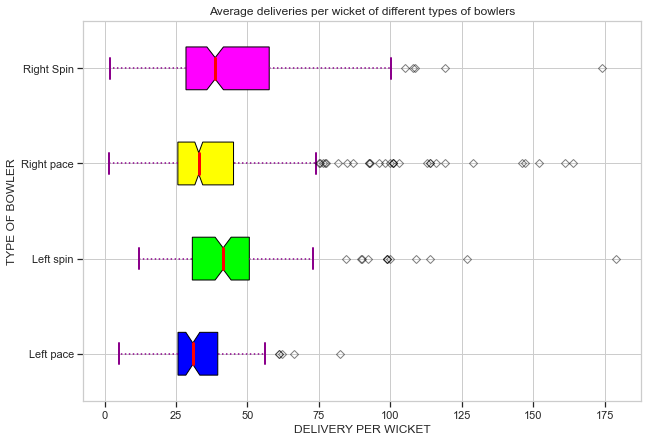

In [24]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot([dellp,dells,delrp,delrs], patch_artist = True,notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

#whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',linewidth = 1.5,linestyle =":")

#caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',color ='#e7298a',alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Left pace', 'Left spin','Right pace', 'Right Spin'])
 
# Adding title
plt.title("Average deliveries per wicket of different types of bowlers")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set(xlabel='DELIVERY PER WICKET', ylabel='TYPE OF BOWLER')
# show plot
plt.show()

# Some inferences drawn
> The left pace bowlers have the lowest avg. deliveries per wicket among all the four types of bowlers

> There is a very high standard deviation (~50% of the mean) in avg. deliveries per wicket for all the four types of bowlers

# Analysis on the deliveries per wicket of the bowlers against left handed batsman

In [25]:
dellp=[]
dells=[]
delrp=[]
delrs=[]
dellp=dflp['delivery_left']/dflp['wickets_left']
dells=dfls['delivery_left']/dfls['wickets_left']
delrp=dfrp['delivery_left']/dfrp['wickets_left']
delrs=dfrs['delivery_left']/dfrs['wickets_left']

In [26]:
dellp=dellp[:len(bowllp)]
dells=dells[:len(bowlls)]
delrp=delrp[:len(bowlrp)]
delrs=delrs[:len(bowlrs)]

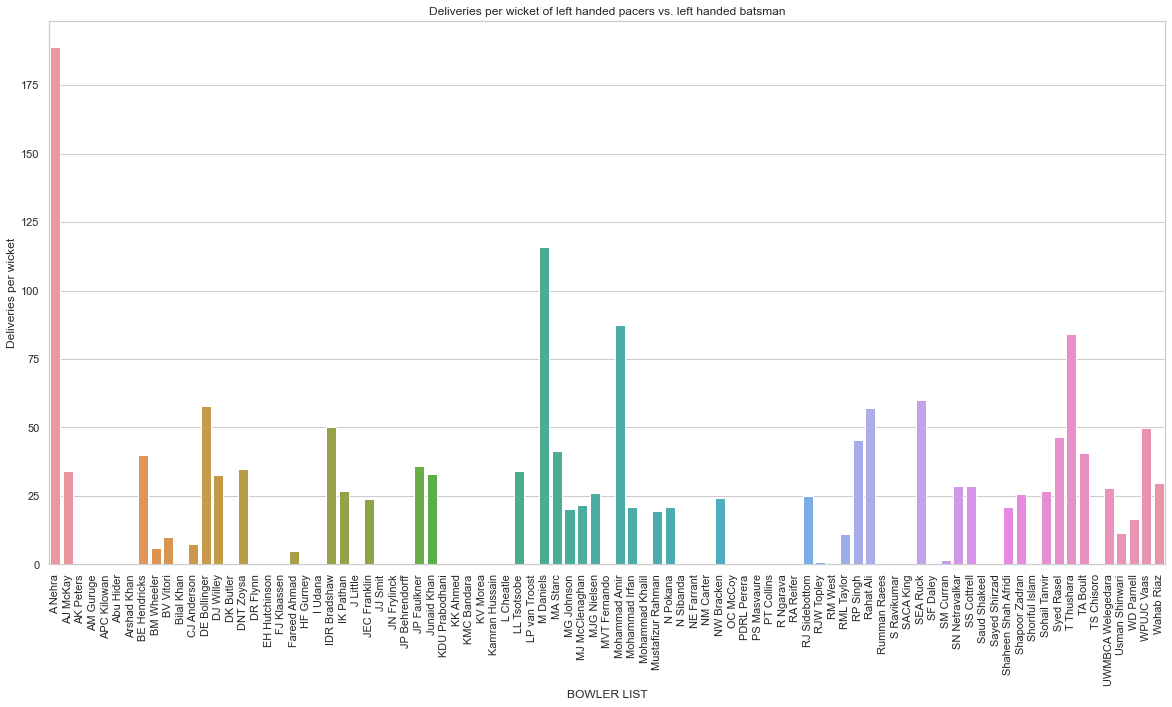

In [27]:
plt.figure(figsize=(20,10))
plt.title('Deliveries per wicket of left handed pacers vs. left handed batsman')
tips={'BOWLER LIST': bowllp, 'Deliveries per wicket' : dellp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

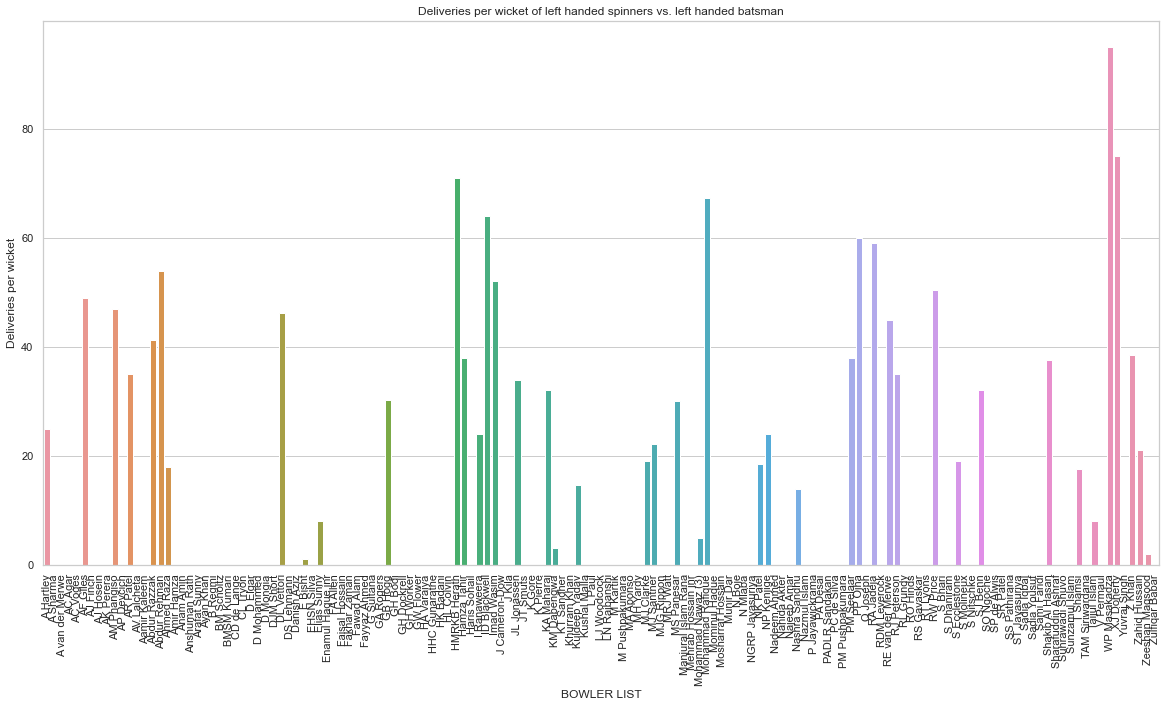

In [28]:
plt.figure(figsize=(20,10))
plt.title('Deliveries per wicket of left handed spinners vs. left handed batsman')
tips={'BOWLER LIST': bowlls, 'Deliveries per wicket' : dells}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

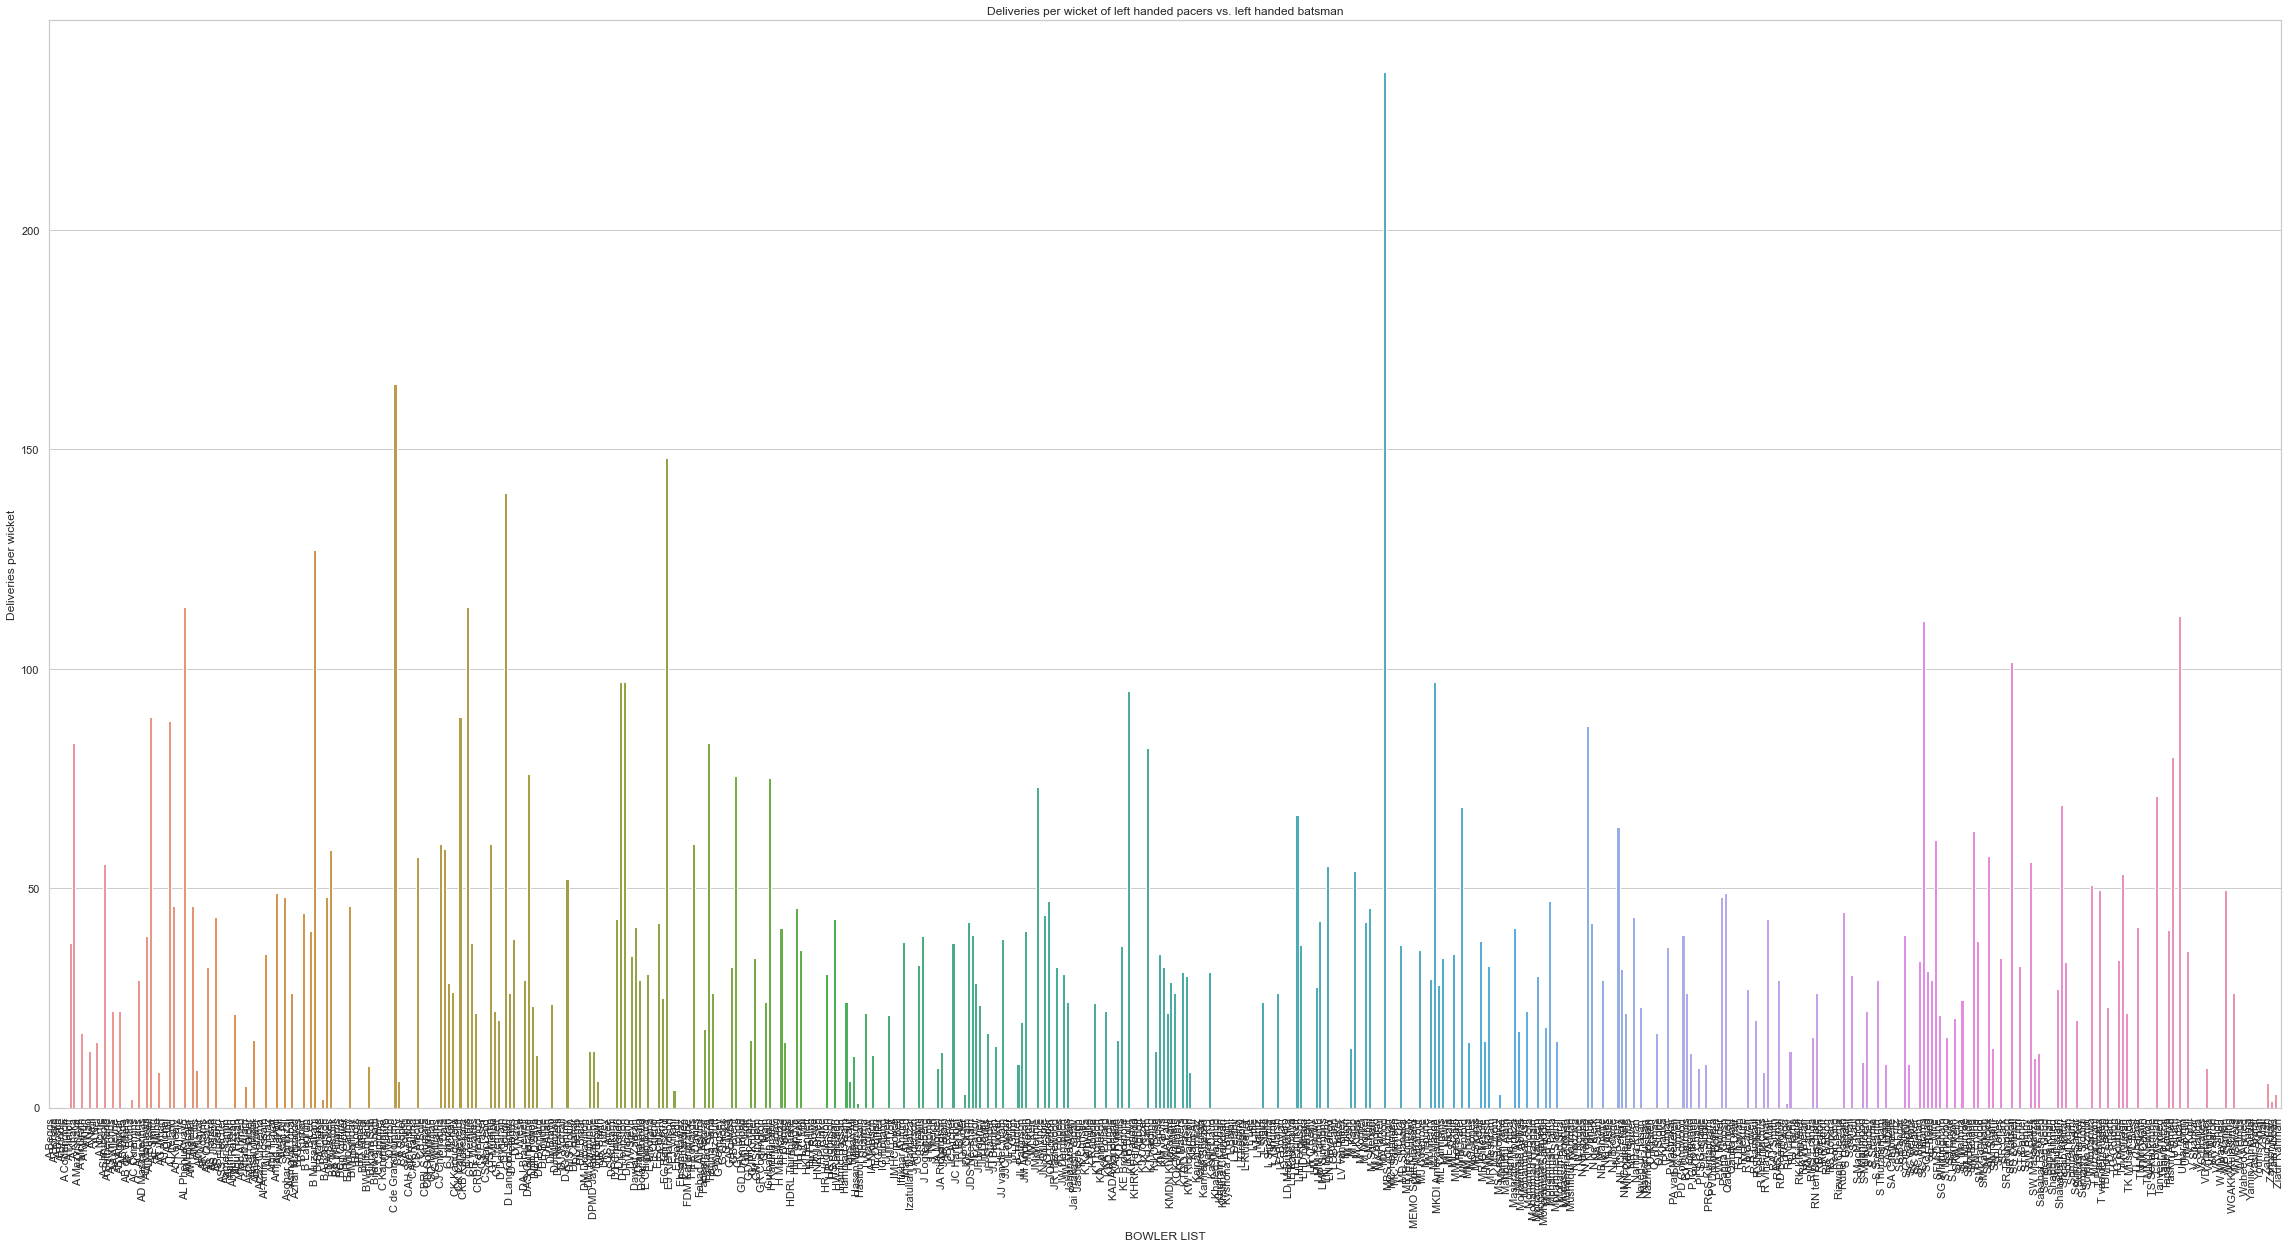

In [29]:
plt.figure(figsize=(40,20))
plt.title('Deliveries per wicket of left handed pacers vs. left handed batsman')
tips={'BOWLER LIST': bowlrp, 'Deliveries per wicket' : delrp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

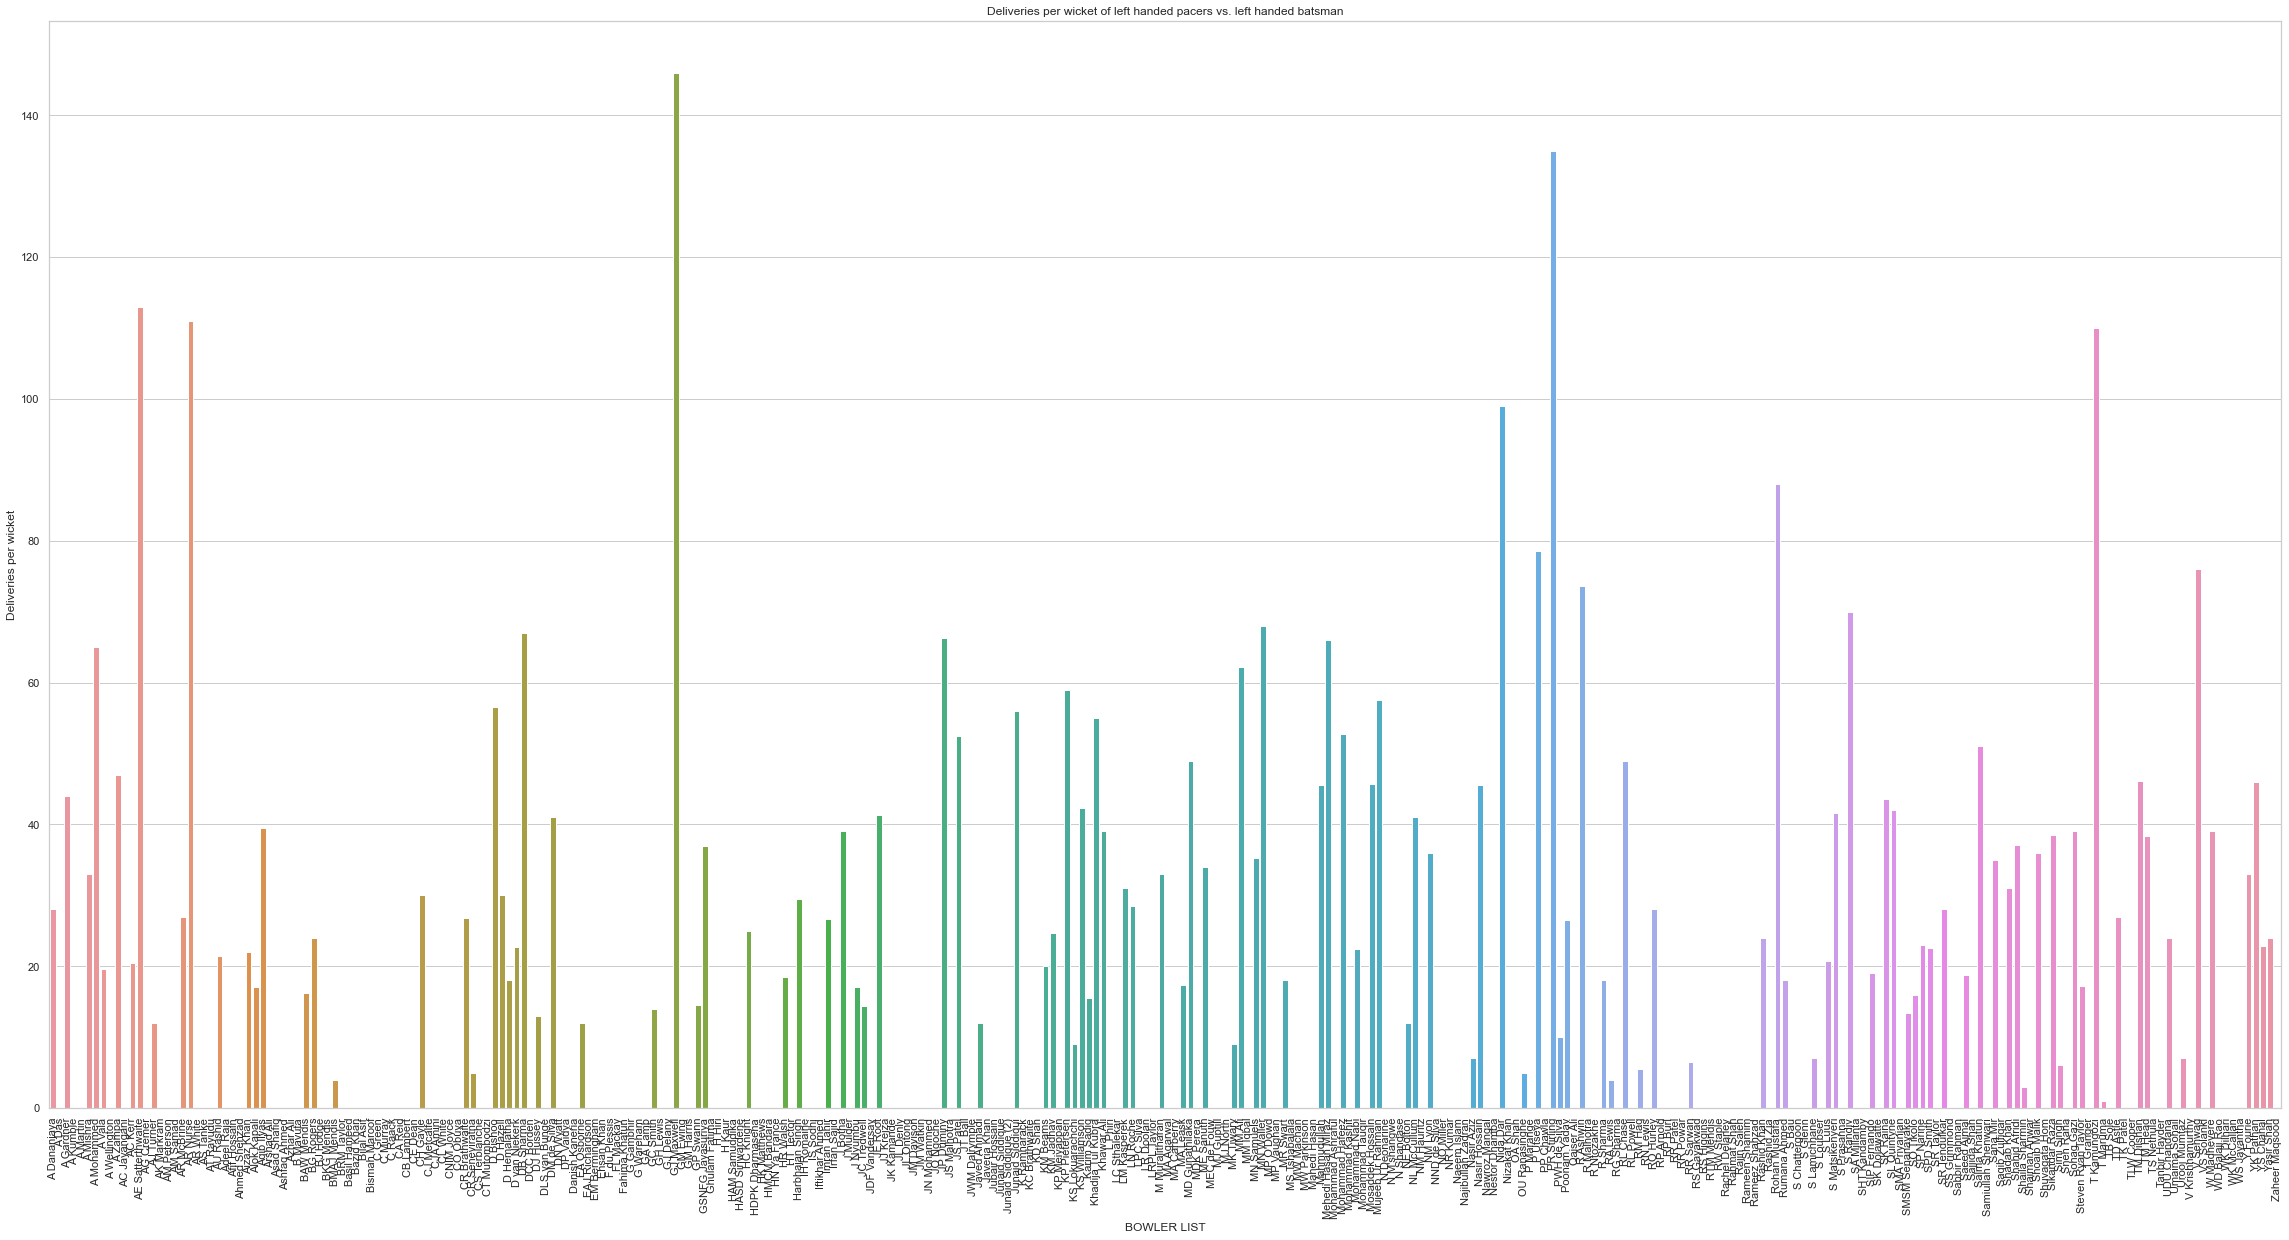

In [30]:
plt.figure(figsize=(40,20))
plt.title('Deliveries per wicket of left handed pacers vs. left handed batsman')
tips={'BOWLER LIST': bowlrs, 'Deliveries per wicket' : delrs}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [31]:
dellpup=[]
dellsup=[]
delrpup=[]
delrsup=[]

for i in dellp:
    if(i<1000):
        dellpup.append(i)
for i in dells:
    if(i<1000):
        dellsup.append(i)
for i in delrp:
    if(i<1000):
        delrpup.append(i)
for i in delrs:
    if(i<1000):
        delrsup.append(i)
        
dellp=dellpup
dells=dellsup
delrp=delrpup
delrs=delrsup

In [32]:
#variance and standard deviation for left pace
print("The mean deliveries per wicket of the bowlers of left pace vs. left handed batsman are:",np.mean(dellp))
print("The variance of deliveries per wicket  of the bowlers of left pace vs. left handed batsman are:",variance(dellp))
print("The standard deviation of deliveries per wicket of the bowlers of left pace vs. left handed batsman are:",stddev(dellp))

The mean deliveries per wicket of the bowlers of left pace vs. left handed batsman are: 36.02743271221532
The variance of deliveries per wicket  of the bowlers of left pace vs. left handed batsman are: 1015.1986443209922
The standard deviation of deliveries per wicket of the bowlers of left pace vs. left handed batsman are: 31.862182039543246


In [33]:
#variance and standard deviation for left spin
print("The mean deliveries per wicket of the bowlers of left spin vs. left handed batsman are:",np.mean(dells))
print("The variance of deliveries per wicket  of the bowlers of left spin vs. left handed batsman are:",variance(dells))
print("The standard deviation of deliveries per wicket of the bowlers of left spin vs. left handed batsman are:",stddev(dells))

The mean deliveries per wicket of the bowlers of left spin vs. left handed batsman are: 34.55140200708383
The variance of deliveries per wicket  of the bowlers of left spin vs. left handed batsman are: 448.4781143797747
The standard deviation of deliveries per wicket of the bowlers of left spin vs. left handed batsman are: 21.17730186732424


In [34]:
#variance and standard deviation for right pace
print("The mean deliveries per wicket of the bowlers of right pace vs. left handed batsman are:",np.mean(delrp))
print("The variance of deliveries per wicket  of the bowlers of right pace vs. left handed batsman are:",variance(delrp))
print("The standard deviation of deliveries per wicket of the bowlers of right pace vs. left handed batsman are:",stddev(delrp))

The mean deliveries per wicket of the bowlers of right pace vs. left handed batsman are: 37.721665300558065
The variance of deliveries per wicket  of the bowlers of right pace vs. left handed batsman are: 902.3335073454816
The standard deviation of deliveries per wicket of the bowlers of right pace vs. left handed batsman are: 30.038866612198962


In [35]:
#variance and standard deviation for right spin
print("The mean deliveries per wicket of the bowlers of right spin vs. left handed batsman are:",np.mean(delrs))
print("The variance of deliveries per wicket  of the bowlers of right spin vs. left handed batsman are:",variance(delrs))
print("The standard deviation of deliveries per wicket of the bowlers of right spin vs. left handed batsman are:",stddev(delrs))

The mean deliveries per wicket of the bowlers of right spin vs. left handed batsman are: 35.42841974298668
The variance of deliveries per wicket  of the bowlers of right spin vs. left handed batsman are: 695.6324251754281
The standard deviation of deliveries per wicket of the bowlers of right spin vs. left handed batsman are: 26.374844552630602


In [36]:
print(len(dellp))
print(len(dells))
print(len(delrp))
print(len(delrs))

46
44
241
127


In [37]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=dellp, b=delrs, equal_var=False))
print(stats.ttest_ind(a=dellp, b=dells, equal_var=False))
print(stats.ttest_ind(a=dellp, b=delrp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=0.11303970272604298, pvalue=0.9103308722081737)
Ttest_indResult(statistic=0.2569840989451378, pvalue=0.7978622551667188)
Ttest_indResult(statistic=-0.3302422411715374, pvalue=0.7423497385961502)


# Some inferences drawn
> The left pace bowlers have the lowest avg. deliveries per wicket vs. left handed batsman among all the four types of bowlers

> There is a very high standard deviation (~65% of the mean) in avg. deliveries per wicket for all the four types of bowlers

In [38]:
dellp=[]
dells=[]
delrp=[]
delrs=[]
dellp=dflp['delivery_right']/dflp['wickets_right']
dells=dfls['delivery_right']/dfls['wickets_right']
delrp=dfrp['delivery_right']/dfrp['wickets_right']
delrs=dfrs['delivery_right']/dfrs['wickets_right']

In [39]:
dellp=dellp[:len(bowllp)]
dells=dells[:len(bowlls)]
delrp=delrp[:len(bowlrp)]
delrs=delrs[:len(bowlrs)]

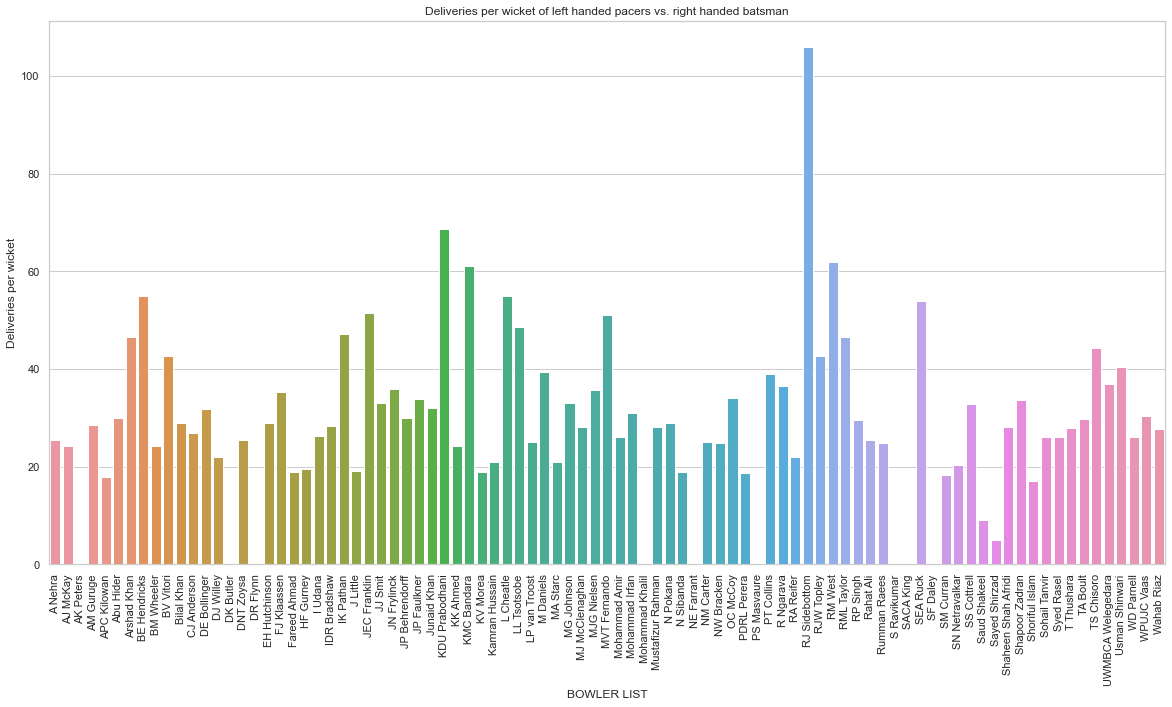

In [40]:
plt.figure(figsize=(20,10))
plt.title('Deliveries per wicket of left handed pacers vs. right handed batsman')
tips={'BOWLER LIST': bowllp, 'Deliveries per wicket' : dellp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

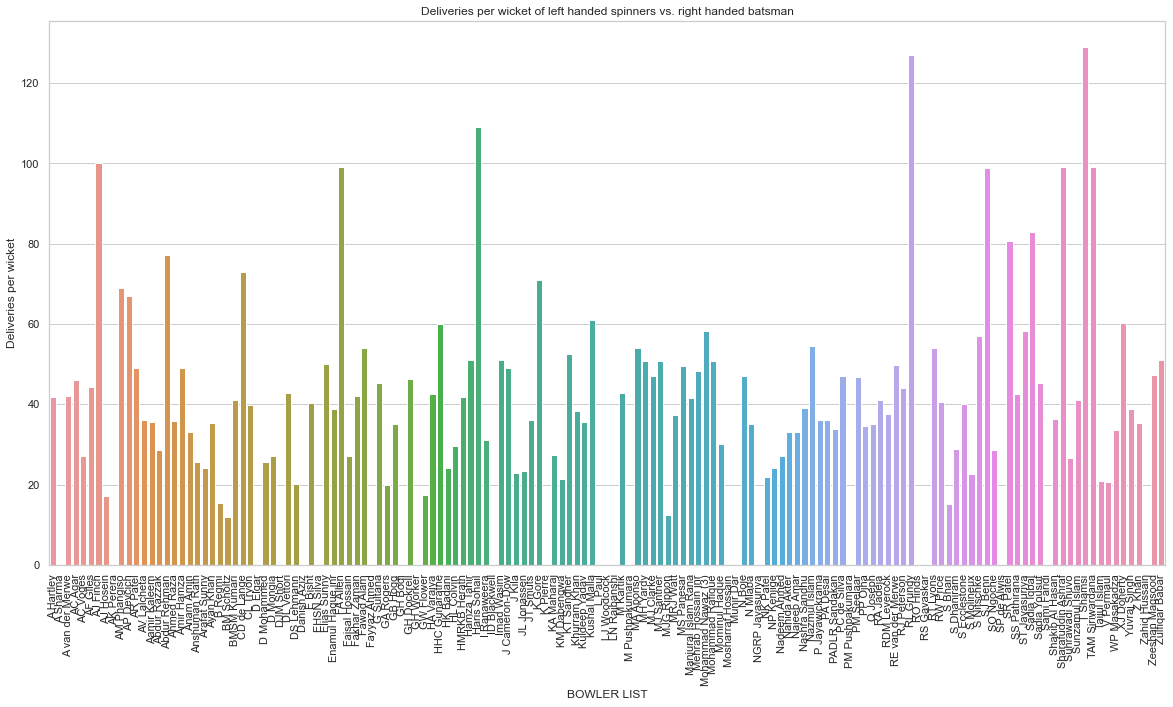

In [41]:
plt.figure(figsize=(20,10))
plt.title('Deliveries per wicket of left handed spinners vs. right handed batsman')
tips={'BOWLER LIST': bowlls, 'Deliveries per wicket' : dells}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

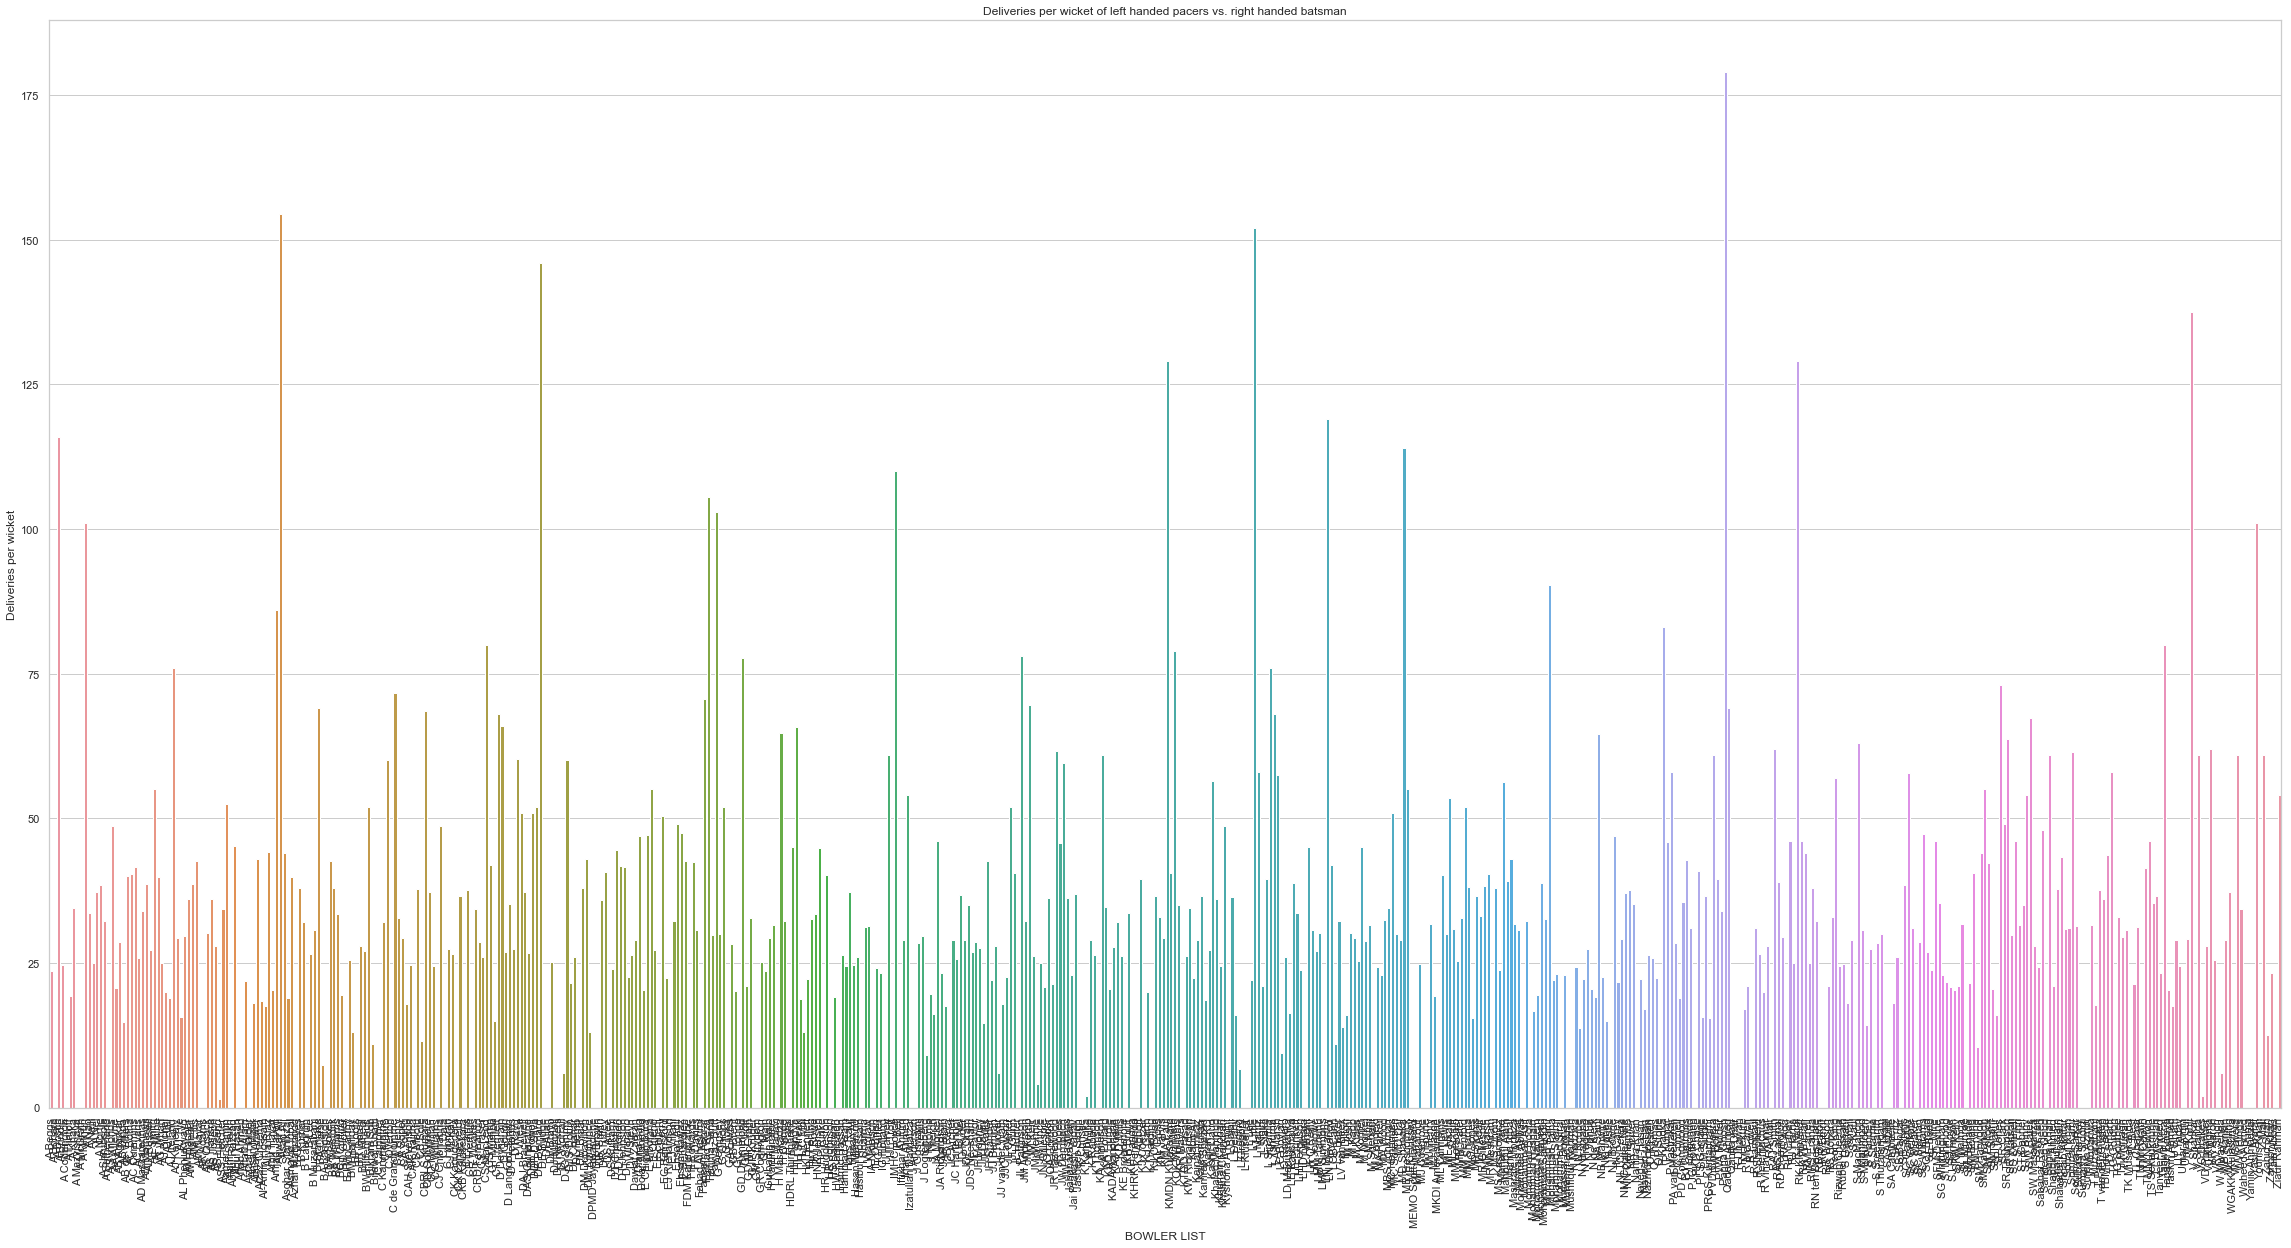

In [42]:
plt.figure(figsize=(40,20))
plt.title('Deliveries per wicket of left handed pacers vs. right handed batsman')
tips={'BOWLER LIST': bowlrp, 'Deliveries per wicket' : delrp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

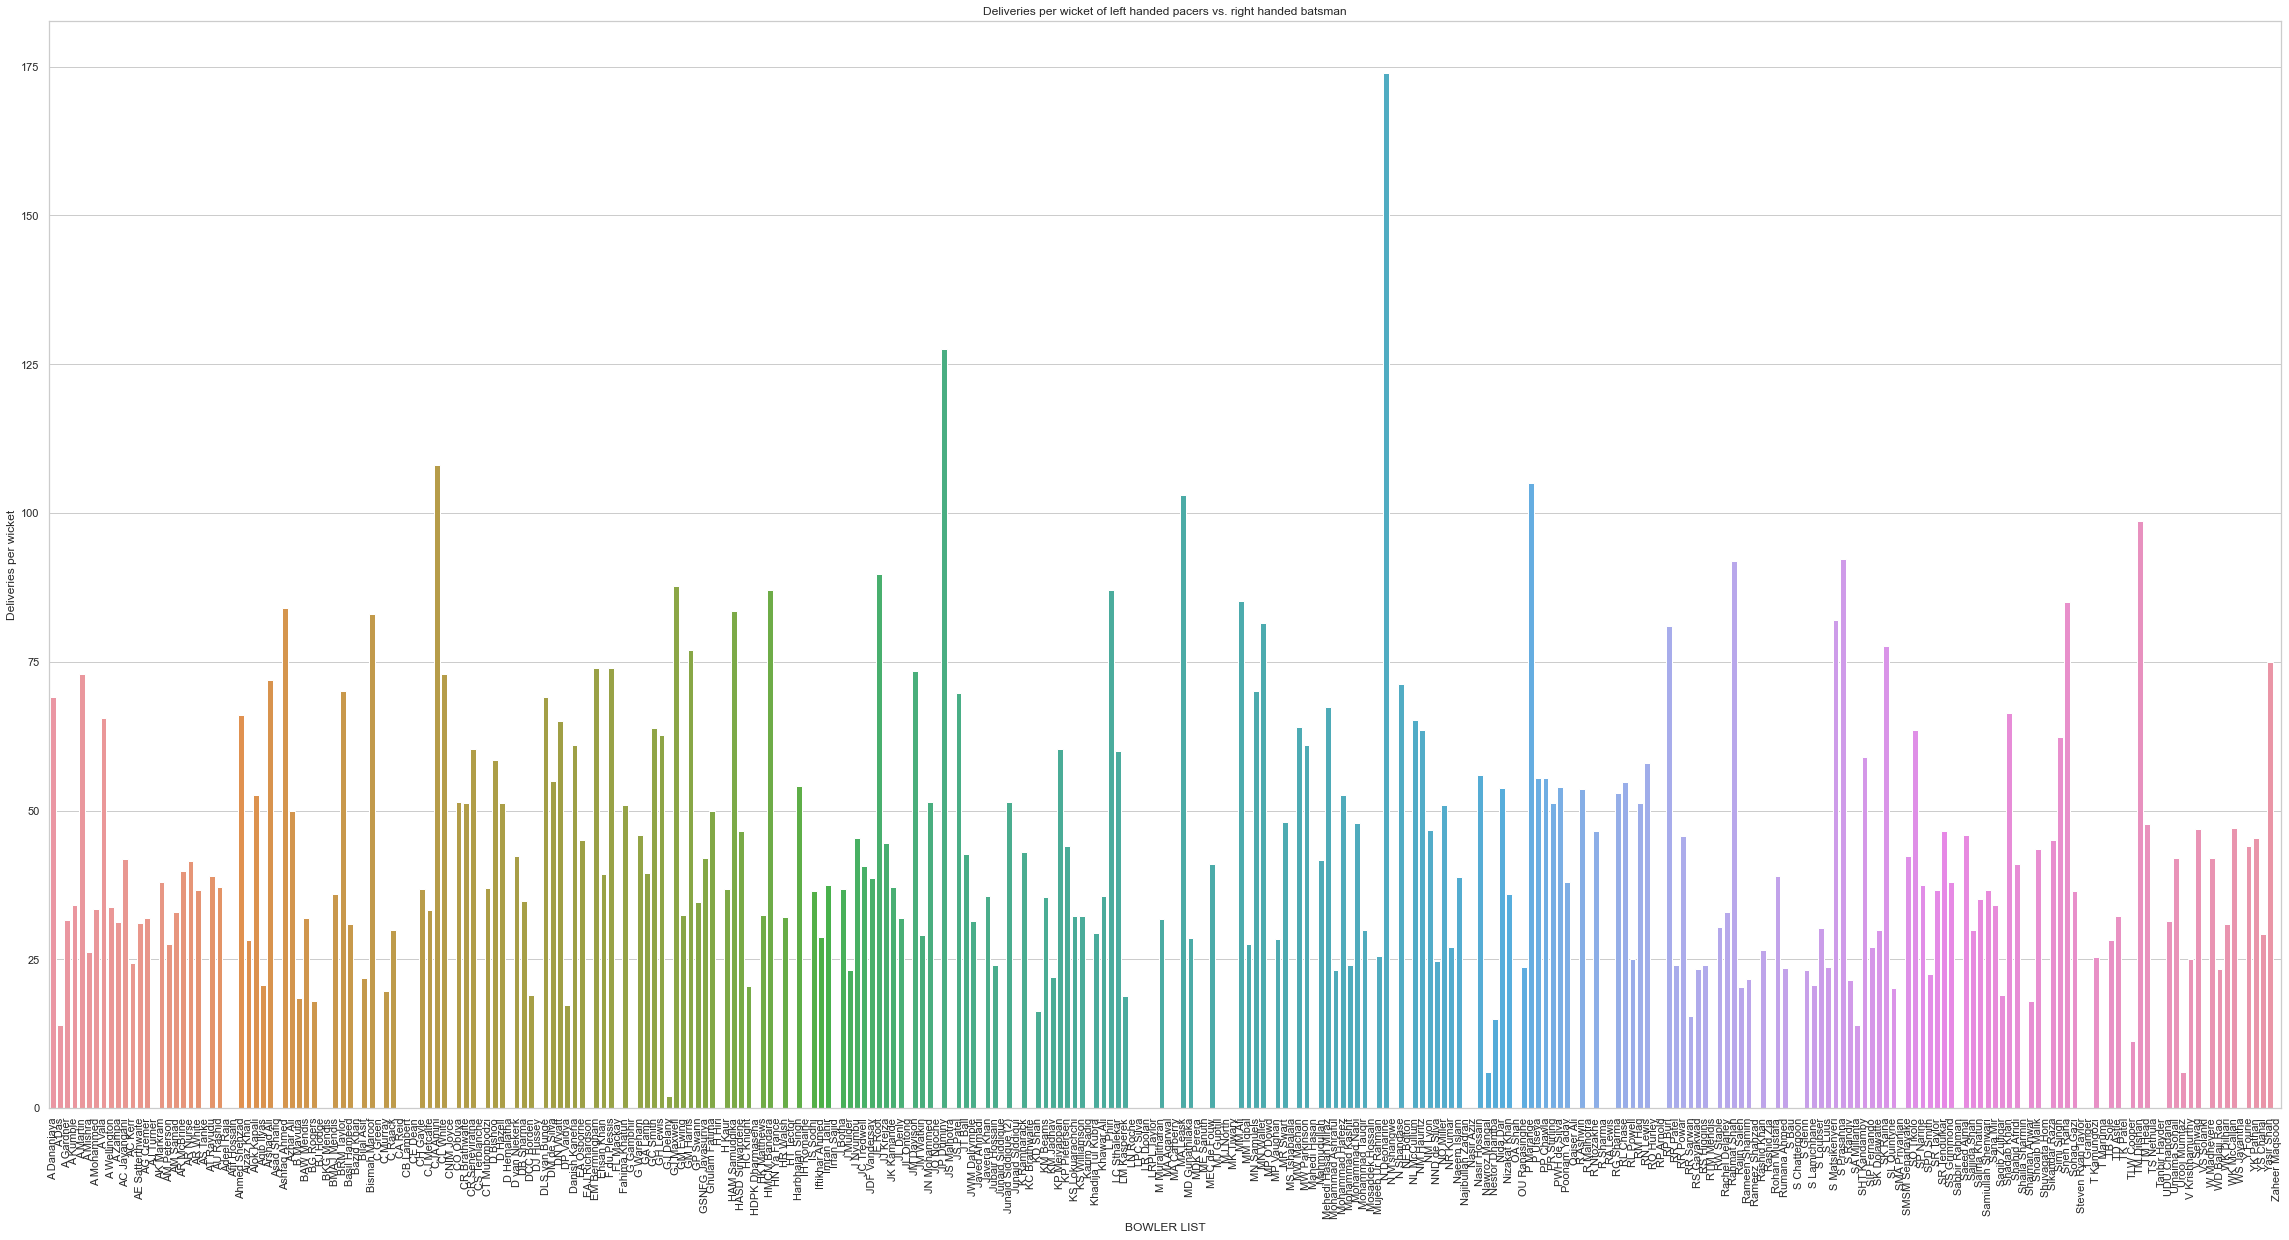

In [43]:
plt.figure(figsize=(40,20))
plt.title('Deliveries per wicket of left handed pacers vs. right handed batsman')
tips={'BOWLER LIST': bowlrs, 'Deliveries per wicket' : delrs}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Deliveries per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [44]:
dellpup=[]
dellsup=[]
delrpup=[]
delrsup=[]

for i in dellp:
    if(i<1000):
        dellpup.append(i)
for i in dells:
    if(i<1000):
        dellsup.append(i)
for i in delrp:
    if(i<1000):
        delrpup.append(i)
for i in delrs:
    if(i<1000):
        delrsup.append(i)
        
dellp=dellpup
dells=dellsup
delrp=delrpup
delrs=delrsup

In [45]:
#variance and standard deviation for left pace
print("The mean deliveries per wicket of the bowlers of left pace vs. right handed batsman are:",np.mean(dellp))
print("The variance of deliveries per wicket  of the bowlers of left pace vs. right handed batsman are:",variance(dellp))
print("The standard deviation of deliveries per wicket of the bowlers of left pace vs. right handed batsman are:",stddev(dellp))

The mean deliveries per wicket of the bowlers of left pace vs. right handed batsman are: 32.56512927238019
The variance of deliveries per wicket  of the bowlers of left pace vs. right handed batsman are: 208.96152556800135
The standard deviation of deliveries per wicket of the bowlers of left pace vs. right handed batsman are: 14.455501567500221


In [46]:
#variance and standard deviation for left spin
print("The mean deliveries per wicket of the bowlers of left spin vs. right handed batsman are:",np.mean(dells))
print("The variance of deliveries per wicket  of the bowlers of left spin vs. right handed batsman are:",variance(dells))
print("The standard deviation of deliveries per wicket of the bowlers of left spin vs. right handed batsman are:",stddev(dells))

The mean deliveries per wicket of the bowlers of left spin vs. right handed batsman are: 44.43248540100373
The variance of deliveries per wicket  of the bowlers of left spin vs. right handed batsman are: 480.03311985432333
The standard deviation of deliveries per wicket of the bowlers of left spin vs. right handed batsman are: 21.90965814097343


In [47]:
#variance and standard deviation for right pace
print("The mean deliveries per wicket of the bowlers of right pace vs. right handed batsman are:",np.mean(delrp))
print("The variance of deliveries per wicket  of the bowlers of right pace vs. right handed batsman are:",variance(delrp))
print("The standard deviation of deliveries per wicket of the bowlers of right pace vs. right handed batsman are:",stddev(delrp))

The mean deliveries per wicket of the bowlers of right pace vs. right handed batsman are: 37.09333720473579
The variance of deliveries per wicket  of the bowlers of right pace vs. right handed batsman are: 508.54383250962877
The standard deviation of deliveries per wicket of the bowlers of right pace vs. right handed batsman are: 22.550916445005704


In [48]:
#variance and standard deviation for right spin
print("The mean deliveries per wicket of the bowlers of right spin vs. right handed batsman are:",np.mean(delrs))
print("The variance of deliveries per wicket  of the bowlers of right spin vs. right handed batsman are:",variance(delrs))
print("The standard deviation of deliveries per wicket of the bowlers of right spin vs. right handed batsman are:",stddev(delrs))

The mean deliveries per wicket of the bowlers of right spin vs. right handed batsman are: 44.70267415082423
The variance of deliveries per wicket  of the bowlers of right spin vs. right handed batsman are: 524.7165025742976
The standard deviation of deliveries per wicket of the bowlers of right spin vs. right handed batsman are: 22.90669121838197


In [49]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=delrp, b=delrs, equal_var=False))
print(stats.ttest_ind(a=delrp, b=dells, equal_var=False))
print(stats.ttest_ind(a=delrp, b=dellp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=-4.144863918447437, pvalue=4.0616164561856755e-05)
Ttest_indResult(statistic=-3.2744297864527416, pvalue=0.0012527705629848495)
Ttest_indResult(statistic=2.3433479950922624, pvalue=0.020397873181807996)


In [50]:
print(len(dellp))
print(len(dells))
print(len(delrp))
print(len(delrs))

80
123
468
231


# Some inferences drawn
> The left pace bowlers have the lowest avg. deliveries per wicket vs. right handed batsman among all the four types of bowlers

> There is a very high standard deviation (~70% of the mean) in avg. deliveries per wicket for all the four types of bowlers